## Make a 1" cube with gyroid structure

In [1]:
from spartantpms.tpms import gyroid_function
import sdf
from sdf import box
import numpy as np
import matplotlib.pyplot as plt

Make the signed distance function representation of the structure

In [2]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 2, 2, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= 0.4
)
innerinfill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= 0.5
)
cube = box((xmax, ymax, zmax))

f = cube & infill - innerinfill #boolean intersection powered by sdf

In [24]:
from spartantpms.tpms.gyroid import sheet_gyroid_function
from spartantpms.tpms.utils import get_porosity

inner_box = box((50.8, 12.7, 5))
outer_box = box((52.8, 14.7, 5))

infill = sheet_gyroid_function(
    lambda_x = 5,
    lambda_y = 5,
    lambda_z = 5,
    porosity = 0.9
)

perimeter = outer_box - inner_box
inside = inner_box & infill

# f = perimeter | inside
f = inside
f.save("gyroid_sheet.stl", sparse=False)

min -28.9862, -8.4543, -4.34793
max 28.9862, 8.4543, 4.34793
step 0.126666, 0.126666, 0.126666
4624656 samples in 225 batches with 20 workers
  100% (225 of 225) [##############################] 0:00:01 0:00:00    
0 skipped, 113 empty, 112 nonempty
794076 triangles in 0.94038 seconds


In [27]:
from spartantpms.tpms.gyroid import sheet_gyroid_function
from spartantpms.tpms.utils import get_porosity

inner_box = box((50.8, 12.7, 5))
outer_box = box((52.8, 14.7, 5))

infill = gyroid_function(
    lambda_x = 5,
    lambda_y = 5,
    lambda_z = 5,
    porosity = 0.7
) - gyroid_function(
    lambda_x = 5,
    lambda_y = 5,
    lambda_z = 5,
    porosity = 0.8
)

perimeter = outer_box - inner_box
inside = inner_box & infill

# f = perimeter | inside
f = inside
f.save("gyroid_sheet_offset.stl", sparse=False)


min -28.9862, -8.4543, -4.34793
max 28.9862, 8.4543, 4.34793
step 0.126666, 0.126666, 0.126666
4624656 samples in 225 batches with 20 workers
  100% (225 of 225) [##############################] 0:00:01 0:00:00    
0 skipped, 113 empty, 112 nonempty
705952 triangles in 0.818887 seconds


c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\sdf\stl.py:9: RuntimeWarning: invalid value encountered in divide
  normals /= np.linalg.norm(normals, axis=1).reshape((-1, 1))


In [73]:
f.save("testgyroid.stl")

min -13.5269, -13.5269, -13.5269
max 13.5269, 13.5269, 13.5269
step 0.167755, 0.167755, 0.167755
4657463 samples in 216 batches with 20 workers
  100% (216 of 216) [##############################] 0:00:01 0:00:00    
1 skipped, 90 empty, 125 nonempty
909148 triangles in 0.82715 seconds


In [21]:
from spartantpms.tpms.utils import get_porosity

def sheetgyroid(p, dp):
    if p-dp <= 0:
        raise ValueError('p-dp must be greater than 0')
    if p >= 1:
        raise ValueError('p must be less than 1')
    
    #test sheet density
    infill = gyroid_function(
        lambda_x = 1,
        lambda_y = 1,
        lambda_z = 1,
        porosity= p-dp
    )
    innerinfill = gyroid_function(
        lambda_x = 1,
        lambda_y = 1,
        lambda_z = 1,
        porosity= p
    )
    cube = box((1, 1, 1), center=(-0.5, -0.5, -0.5))
    
    return cube & infill - innerinfill

In [24]:
sheetgyroid(0.5, 0.1).save('sheet05.stl', step=0.01, sparse=False)
sheetgyroid(0.4, 0.1).save('sheet04.stl', step=0.01, sparse=False)

min -1.04179, -1.04179, -1.04179
max 0.0947082, 0.0947082, 0.0947082
step 0.01, 0.01, 0.01
1601613 samples in 64 batches with 20 workers
  100% (64 of 64) [##############################] 0:00:00 0:00:00    
0 skipped, 4 empty, 60 nonempty
200768 triangles in 0.298149 seconds
min -1.04179, -1.04179, -1.04179
max 0.0947082, 0.0947082, 0.0947082
step 0.01, 0.01, 0.01
1601613 samples in 64 batches with 20 workers
  100% (64 of 64) [##############################] 0:00:00 0:00:00    
0 skipped, 4 empty, 60 nonempty
194168 triangles in 0.309151 seconds


In [ ]:

allp = np.round(np.linspace(0, 1, 11), 3)
alldp = np.round(np.linspace(0.1, 0.9, 11), 3)

net_porosity = np.zeros((len(allp), len(alldp)))

for i, p in enumerate(allp):
    for j, dp in enumerate(alldp):
        try:
            netpo = get_porosity(sheetgyroid(p, dp))
        except:
            netpo=np.nan
        net_porosity[i,j] = netpo

Text(0, 0.5, 'p')

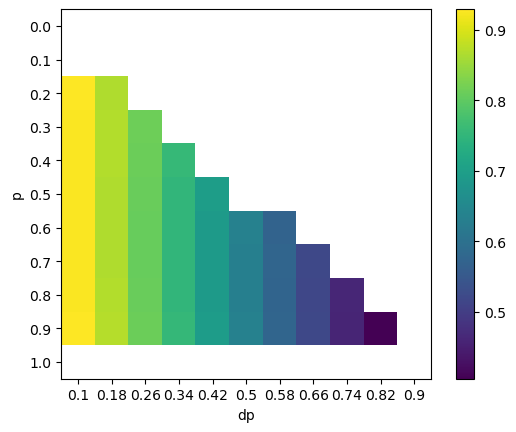

In [67]:
plt.imshow(net_porosity)
plt.colorbar()

plt.xticks(np.arange(len(alldp)), alldp)
plt.yticks(np.arange(len(allp)), allp)
plt.xlabel('dp')
plt.ylabel('p')

Plot (note this is very slow in matplotlib -- keep `mesh_ct` low to avoid long rendering times)

In [34]:
from spartantpms.tpms.utils import to_voxels

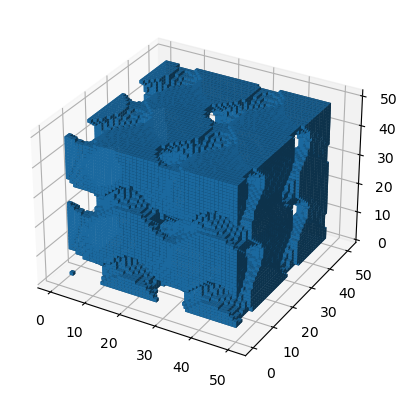

In [35]:
voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Change the periodicity in each dimension

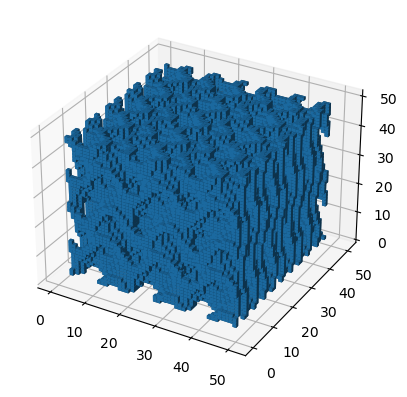

In [23]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 3, 5, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction
)

innerinfill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction*2
)

cube = box((xmax, ymax, zmax))

f = cube & (infill - innerinfill) #boolean intersection powered by sdf

voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Rotate in x, y, and/or z

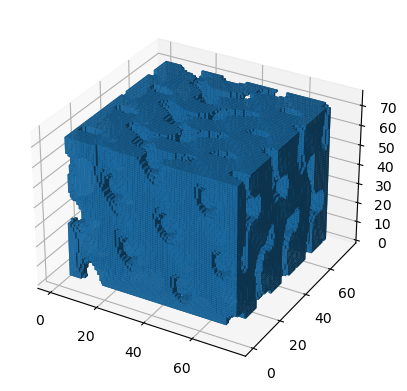

In [7]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 3, 5, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    theta_x = 45, #degrees
    theta_y = 10,
    theta_z = 75,
    porosity= pore_fraction
)
cube = box((xmax, ymax, zmax))

f = cube & infill #boolean intersection powered by sdf

voxels = to_voxels(f, mesh_ct=76) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Confirm the pore_fraction is accurate

In [5]:
from spartantpms.tpms.utils import get_porosity

In [6]:
gyroid_types = [
    (2,2,2),
    (3,5,2),
    (1,0.5,0.2)
]

pore_fractions = np.linspace(0, 1, 21)
porosities = [[], [], []]
for i, (nx, ny, nz) in enumerate(gyroid_types):
    for pf in pore_fractions:
        infill = gyroid_function(
            lambda_x = xmax/nx,
            lambda_y = ymax/ny,
            lambda_z = xmax / nz,
            porosity= pf
        )
        cube = box((xmax, ymax, zmax))
        f = cube & infill #boolean intersection powered by sdf
        
        porosities[i].append(
            get_porosity(
                f,
                mesh_ct = 101,
                bounds = (
                    (-xmax/2, -ymax/2, -zmax/2),
                    (xmax/2, ymax/2, zmax/2)
                ) #structure is centered at (0,0,0)
        ))

We see a maximum ~0.6% error in porosity using our functions. This could be an artifact from the relatively low mesh density used to voxelate structures before computing the pore fraction...

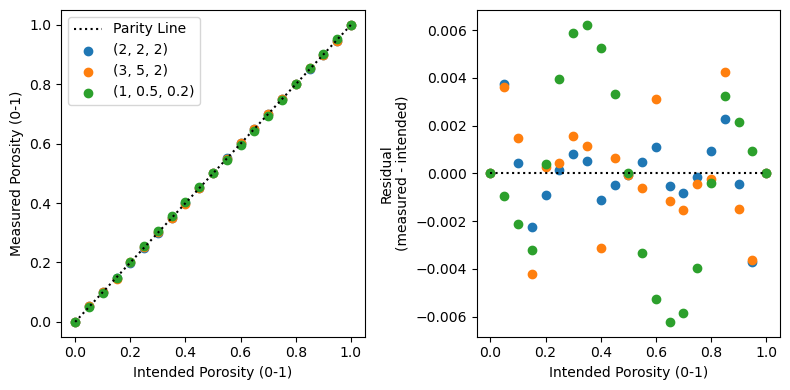

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot([0,1], [0,1], "k:", label="Parity Line")
ax[1].plot([0,1], [0,0], "k:", label="Parity Line")
for (periods, porosity) in zip(gyroid_types, porosities):
    ax[0].scatter(pore_fractions, porosity, label=periods)
    ax[1].scatter(pore_fractions, porosity-pore_fractions, label=periods)
ax[0].legend()

ax[0].set_xlabel("Intended Porosity (0-1)")
ax[0].set_ylabel("Measured Porosity (0-1)")
ax[1].set_xlabel("Intended Porosity (0-1)")
ax[1].set_ylabel("Residual\n(measured - intended)")

plt.tight_layout()
plt.show()

Export to STL

In [8]:
from spartantpms.stl import generate_stl

generate_stl(
    f=f,
    fpath="1inch_gyroid.stl",
    step=0.2
)

min -13.5269, -13.5269, -13.5269
max 13.5269, 13.5269, 13.5269
step 0.2, 0.2, 0.2
Wrote file to 1inch_gyroid.stl


---
## Make a 1" cube with diamond structure

In [1]:
from spartantpms.tpms import diamond_function
from sdf import box
import numpy as np
import matplotlib.pyplot as plt

Make the signed distance function representation of the structure

In [18]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 2, 2, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = diamond_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= 0.5
)
innerinfill = diamond_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= 0.7
)
cube = box((xmax, ymax, zmax))

f = cube & (infill - innerinfill) #boolean intersection powered by sdf

Plot (note this is very slow in matplotlib -- keep `mesh_ct` low to avoid long rendering times)

In [19]:
from spartantpms.tpms.utils import to_voxels

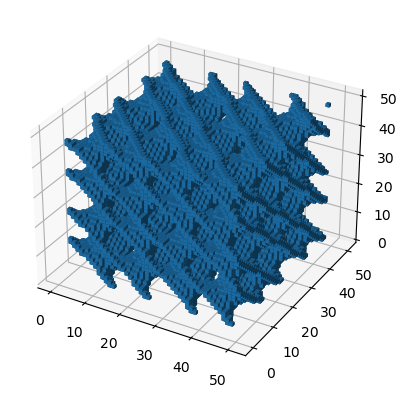

In [20]:
voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Change the periodicity in each dimension

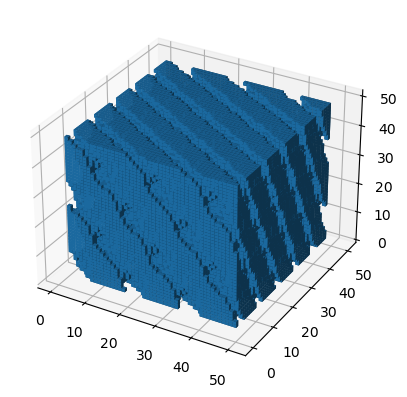

In [5]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 3, 5, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = diamond_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction
)
cube = box((xmax, ymax, zmax))

f = cube & infill #boolean intersection powered by sdf

voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Confirm the pore_fraction is accurate

In [3]:
from spartantpms.tpms.utils import get_porosity

In [4]:
diamond_types = [
    (2,2,2),
    (3,5,2),
    (1,0.5,0.2)
]

pore_fractions = np.linspace(0, 1, 21)
porosities = [[], [], []]
for i, (nx, ny, nz) in enumerate(diamond_types):
    for pf in pore_fractions:
        infill = diamond_function(
            lambda_x = xmax/nx,
            lambda_y = ymax/ny,
            lambda_z = xmax / nz,
            porosity= pf
        )
        cube = box((xmax, ymax, zmax))
        f = cube & infill #boolean intersection powered by sdf
        
        porosities[i].append(
            get_porosity(
                f,
                mesh_ct = 101,
                bounds = (
                    (-xmax/2, -ymax/2, -zmax/2),
                    (xmax/2, ymax/2, zmax/2)
                ) #structure is centered at (0,0,0)
        ))

We see a maximum ~1% error in porosity using our diamond functions. This could be an artifact from the relatively low mesh density used to voxelate structures before computing the pore fraction...

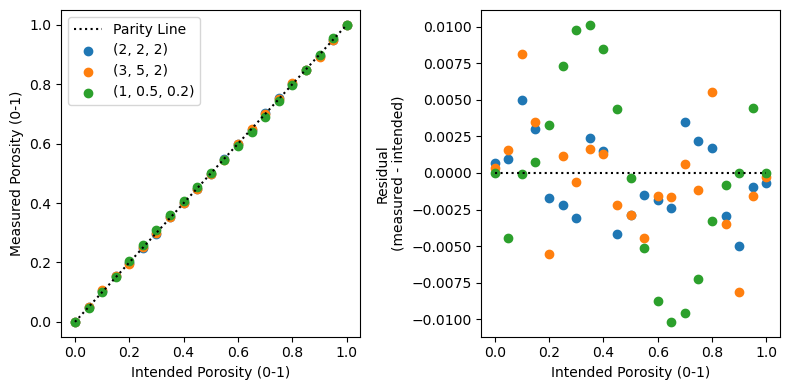

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot([0,1], [0,1], "k:", label="Parity Line")
ax[1].plot([0,1], [0,0], "k:", label="Parity Line")
for (periods, porosity) in zip(diamond_types, porosities):
    ax[0].scatter(pore_fractions, porosity, label=periods)
    ax[1].scatter(pore_fractions, porosity-pore_fractions, label=periods)
ax[0].legend()

ax[0].set_xlabel("Intended Porosity (0-1)")
ax[0].set_ylabel("Measured Porosity (0-1)")
ax[1].set_xlabel("Intended Porosity (0-1)")
ax[1].set_ylabel("Residual\n(measured - intended)")

plt.tight_layout()
plt.show()

In [ ]:
from spartantpms.stl import generate_stl

generate_stl(
    f=f,
    fpath="1inch_diamond.stl",
    step=0.2
)